In [1]:
def gibbs_sampling(j,x_in,rbm):
    counter = 0
    while counter < j:
        gibbs_x = rbm.gibbs(x_in)
        x_in = np.zeros_like(x_in)
        #pixel turning
        x_in[gibbs_x] = 1
        counter+=1
    return x_in

In [2]:
import time
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import BernoulliRBM
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
x,_ = mnist.train.next_batch(5000)
y,_ = mnist.test.next_batch(1000)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html
rbm = BernoulliRBM(n_components=100, learning_rate=0.02, batch_size=50, n_iter=100, random_state=0, verbose=1)

In [5]:
rbm.fit(x)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -237.67, time = 0.26s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -202.27, time = 0.32s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -185.14, time = 0.31s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -174.44, time = 0.30s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -163.92, time = 0.34s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -156.77, time = 0.36s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -150.58, time = 0.33s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -145.58, time = 0.31s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -142.07, time = 0.32s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -138.24, time = 0.33s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -135.81, time = 0.35s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -132.86, time = 0.38s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -130.70, time = 0.39s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -128.56, time = 0.39s
[BernoulliRBM] 

BernoulliRBM(batch_size=50, learning_rate=0.02, n_components=100, n_iter=100,
       random_state=0, verbose=1)

In [6]:
#Removing parts
gen_x = gibbs_sampling(1,x[:100][:78*8],rbm)

In [7]:
#Sampling to generate
z = y[:100]
gen_z = gibbs_sampling(10,z,rbm)

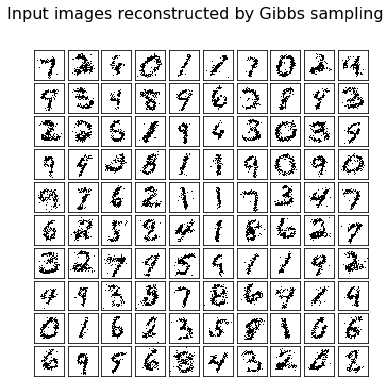

In [8]:
plt.figure(figsize=(6, 6))
for i, comp in enumerate(gen_x):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Input images reconstructed by Gibbs sampling', fontsize=16)
plt.subplots_adjust(wspace=0.1,hspace=0.1) # width and hight reserved for blank space

plt.show()

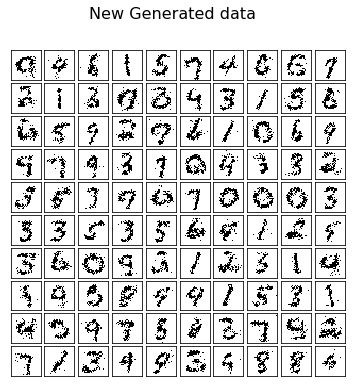

In [9]:
plt.figure(figsize=(6, 6))
for i, comp in enumerate(gen_z):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('New Generated data', fontsize=16)
plt.subplots_adjust(wspace=0.1,hspace=0.1) # width and hight reserved for blank space

plt.show()